In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [2]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

(150, 2)


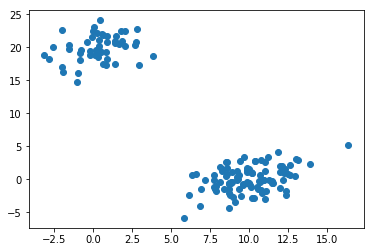

In [4]:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [166]:
Z = linkage(X, 'ward')
Z.shape

(149, 4)

In [54]:
import pandas as pd
import numpy as np

In [55]:
df = pd.DataFrame(Z)

In [24]:
Z.shape

(149, 4)

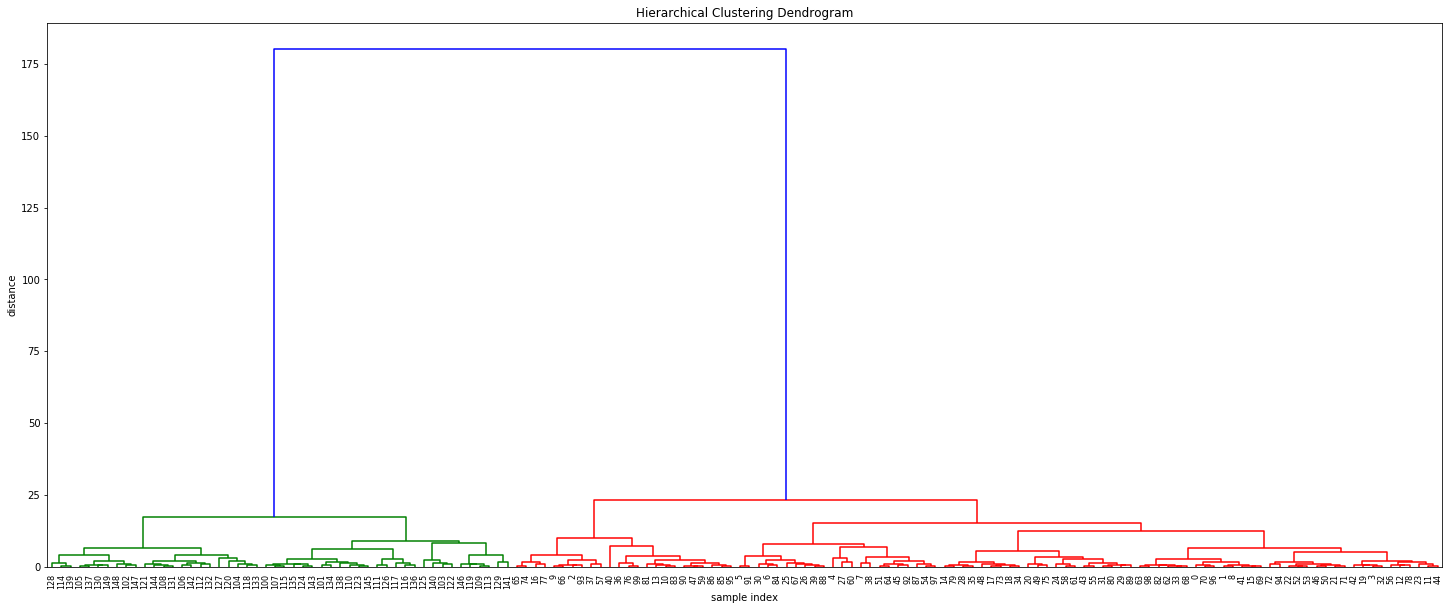

In [32]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

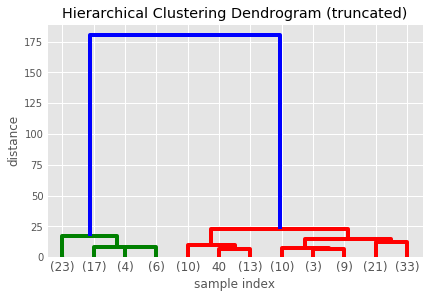

In [115]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts= True,  # otherwise numbers in brackets are counts
    leaf_rotation=0.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [113]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
    print(ddata.keys())

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])


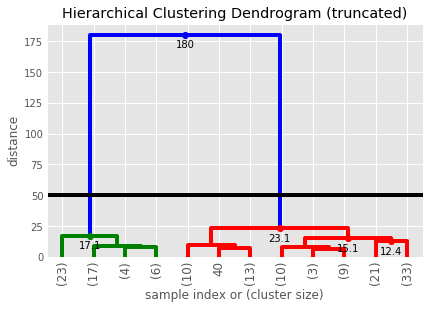

In [114]:
max_d = 50

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])


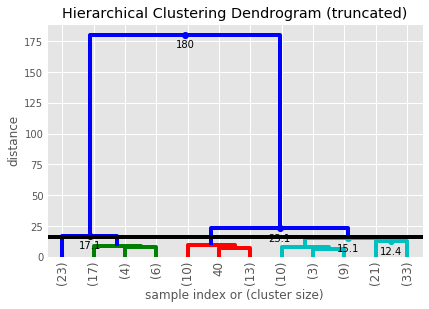

In [119]:
max_d = 16

A = fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [117]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

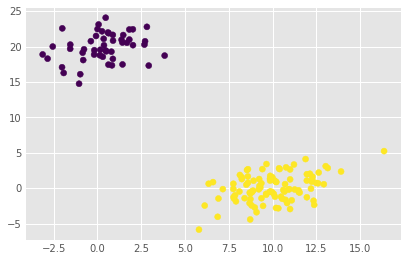

In [118]:
plt.scatter(X[:,0], X[:,1], c=clusters)

In [131]:
from sklearn.manifold import TSNE

In [163]:
model = TSNE(learning_rate=150)
transformed = model.fit_transform(X)

(150,)

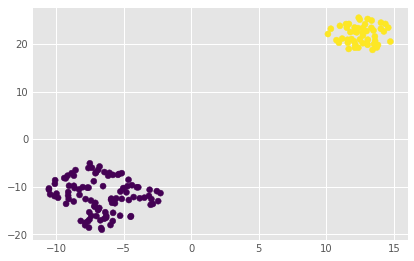

In [164]:
transformed_X = transformed[:,0]
transformed_Y = transformed[:,1]
plt.scatter(transformed_X, transformed_Y, c=labels)

transformed_Y.shape

In [138]:
from sklearn.cluster import KMeans

In [161]:
K_model = KMeans(n_clusters=2)
labels = K_model.fit_predict(X)

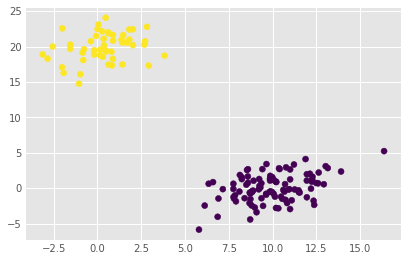

In [162]:
plt.scatter(X[0:,0], X[0:,1], c=labels)

In [157]:
labels.shape

(149,)